# 사람들의 용기 구독에 대한 willing to pay
===============================================================

- **필요한 모듈 import**

In [45]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly
from plotly import tools
import seaborn as sns
import os
plt.rcParams['font.family'] = 'AppleGothic'

## 재활용품 분리 배출하기 데이터
- 대상 : 13세 이상 인구
- 출처 : <http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN072R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE>

### 전체 데이터 전처리

In [13]:
recycle_df = pd.read_csv("101_DT_1SSEN072R_20200912162646.csv", encoding='cp949')
recycle_df

# 맥과 윈도우의 한글 인코딩 방식 차이 => 맥은 utf-8 방식을 쓰고 윈도우는 cp949 방식
# 윈도우에서 엑셀로 파일을 열고 저장을 하면 cp949방식으로 저장을 하기 때문에 이걸로 인코딩해줘야 함

,행정구역별,특성별,항목,단위,2014 년,2016 년,2018 년,Unnamed: 7
0,전국,계,계,NaN,100.0,100.0,100.0,NaN
1,전국,계,매우 노력함,NaN,47.5,47.8,48.3,NaN
2,전국,계,약간 노력함,NaN,43.0,43.3,43.5,NaN
3,전국,계,별로 노력하지 않음,NaN,8.7,8.1,7.4,NaN
4,전국,계,전혀 노력하지 않음,NaN,0.8,0.8,0.8,NaN
...,...,...,...,...,...,...,...,...
1675,제주,불만족,계,NaN,100.0,100.0,100.0,NaN
1676,제주,불만족,매우 노력함,NaN,50.2,48.0,46.2,NaN
1677,제주,불만족,약간 노력함,NaN,42.0,41.0,44.1,NaN
1678,제주,불만족,별로 노력하지 않음,NaN,6.2,8.0,6.0,NaN


In [17]:
# 상관없는 컬럼인 단위, Unnamed: 7 은 버려주기 
recycle_df.drop(columns=["단위","Unnamed: 7"], inplace=True)

     Q.우리가 이런 특성중에 사용해야할 것이 있을까? (아래)
        +) 다른 데이터들도 이 컬럼을 가지고 있음.. 같이 이야기해보기

In [37]:
recycle_df.특성별.unique()

array(['계', '동부', '읍면부', '남자', '여자', '단독주택', '아파트', '기 타1', '15∼19세',
       '13∼19세', '20∼29세', '30∼39세', '40∼49세', '50∼59세', '60세이상', '65세이상',
       '초졸이하', '중 졸', '고 졸', '대졸이상', '미? 혼', '배우자 있음', '사? 별', '이? 혼',
       '취? 업', '실업 및 비경제활동', '농림어업', '광공업', '사회간접자본?기타서비스업', '전문관리',
       '사? 무', '서비스판매', '농어업', '기능노무', '임금근로자', '고용주', '자영자', '만족', '보통',
       '불만족', '100만원 미만', '100∼200만원 미만', '200∼300만원 미만', '300∼400만원 미만',
       '400~500만원 미만', '500∼600만원 미만', '600만원 이상', '15~19세*남자',
       '15~19세*여자', '13~19세*남자', '13~19세*여자', '20∼29세*남자', '20∼29세*여자',
       '30∼39세*남자', '30∼39세*여자', '40∼49세*남자', '40∼49세*여자', '50∼59세*남자',
       '50∼59세*여자', '60세 이상*남자', '60세 이상*여자', '65세 이상*남자', '65세 이상*여자',
       '20∼29세*중졸이하', '20∼29세*고졸', '20∼29세*대졸이상', '30∼39세*중졸이하',
       '30∼39세*고졸', '30∼39세*대졸이상', '40∼49세*중졸이하', '40∼49세*고졸',
       '40∼49세*대졸이상', '50∼59세*중졸이하', '50∼59세*고졸', '50∼59세*대졸이상',
       '60세 이상*중졸이하', '60세 이상*고졸', '60세 이상*대졸이상', '65세 이상*중졸이하',
       '65세 이상*고졸', '65세 이상*대

In [40]:
# 일단 서비스를 특성을 따져서 제공할 예정은 아니기 때문에 제거
# 총합 인 '계'로만 뽑고 나머지는 버려주도록
recycle = recycle_df[recycle_df["특성별"] == "계"]
recycle.drop(columns=["특성별"], inplace=True)

### 필요 데이터 추출 (전국, 서울, 대구)

In [41]:
# 전국 데이터 뽑기
recycle_all = recycle[recycle_df["행정구역별"] == "전국"]
recycle_all

,행정구역별,항목,2014 년,2016 년,2018 년
0,전국,계,100.0,100.0,100.0
1,전국,매우 노력함,47.5,47.8,48.3
2,전국,약간 노력함,43.0,43.3,43.5
3,전국,별로 노력하지 않음,8.7,8.1,7.4
4,전국,전혀 노력하지 않음,0.8,0.8,0.8


In [43]:
# 서울 데이터 뽑기
recycle_seoul = recycle[recycle["행정구역별"] == "서울"]
recycle_seoul

,행정구역별,항목,2014 년,2016 년,2018 년
405,서울,계,100.0,100.0,100.0
406,서울,매우 노력함,53.7,54.4,54.4
407,서울,약간 노력함,40.1,37.8,39.0
408,서울,별로 노력하지 않음,5.6,7.0,5.9
409,서울,전혀 노력하지 않음,0.6,0.8,0.7


In [44]:
# 대구 데이터 뽑기
recycle_daegu = recycle[recycle["행정구역별"] == "대구"]
recycle_daegu

,행정구역별,항목,2014 년,2016 년,2018 년
555,대구,계,100.0,100.0,100.0
556,대구,매우 노력함,44.8,41.9,32.0
557,대구,약간 노력함,45.2,49.4,54.4
558,대구,별로 노력하지 않음,9.0,8.0,11.9
559,대구,전혀 노력하지 않음,1.0,0.6,1.7


### 지역별 변화 시각화

**< 전국 >**

In [107]:
# 시각화 함수 만들어주기

def make_graph(data=None):
    df = data.iloc[:, 2:]
    df.index = data['항목']
    
    plt.figure(figsize=(10,4))
    plt.plot(df.iloc[1, :].index, df.iloc[1, :])
    plt.plot(df.iloc[2, :].index, df.iloc[2, :])
    plt.plot(df.iloc[3, :].index, df.iloc[3, :])
    plt.plot(df.iloc[4, :].index, df.iloc[4, :])

    plt.xlabel('연도', fontsize=15)
    plt.ylabel('비중 (단위:%)',fontsize=15)
    plt.title("[ {} 정도 변화 ]".format(data.iloc[0,0]))

    plt.legend(df.index[1:])
    plt.show()

**< 전국 >**

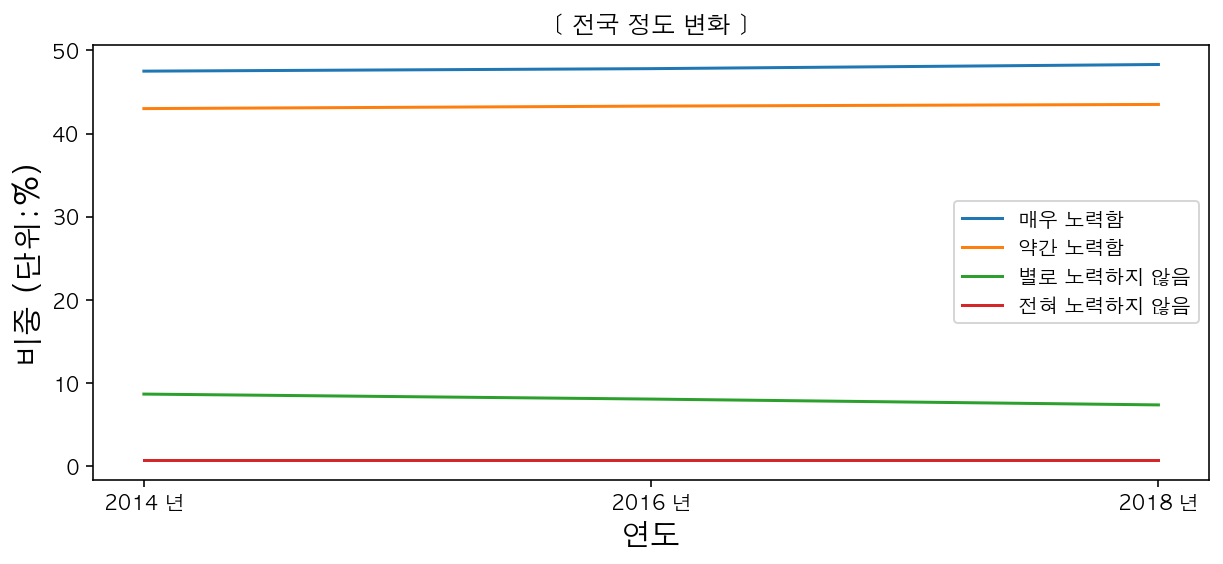

In [108]:
make_graph(data=recycle_all)

- 표본 단위가 커서 그런지 거의 정도의 변화가 보이지 않음
- 매우 노력함, 약간 노력함이 합쳐서 90프로가 넘는 높은 수치를 보임

**< 서울 >**

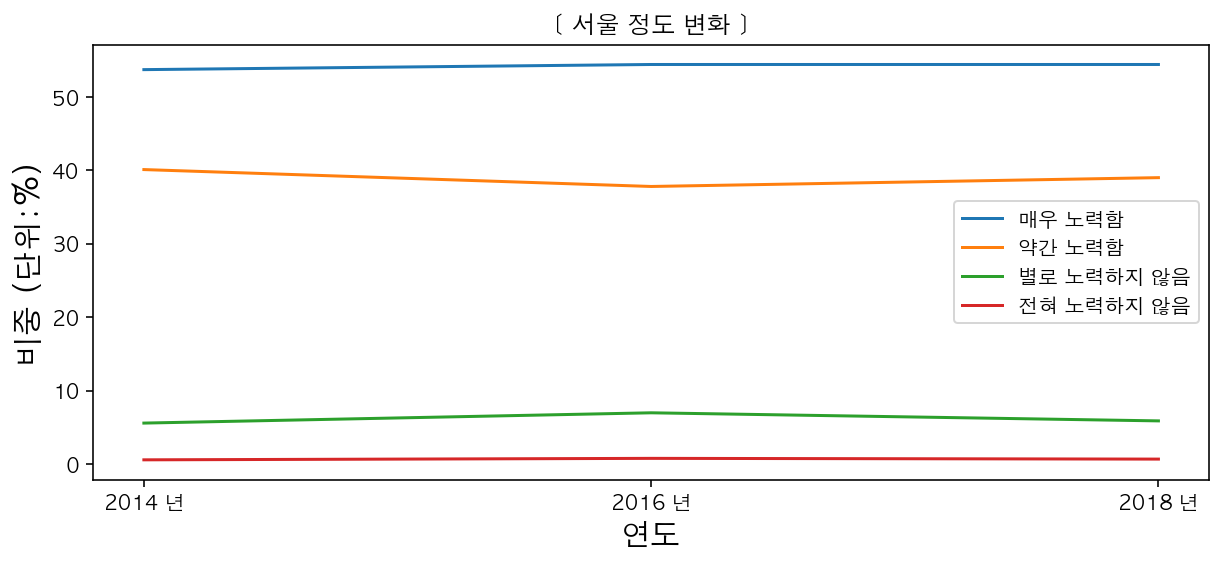

In [109]:
make_graph(data=recycle_seoul)

- 전국 단위에 비해서 매우 노력함의 비중이 조금 더 크다
- 역시나 변화가 크지는 않은 편

**< 대구 >**

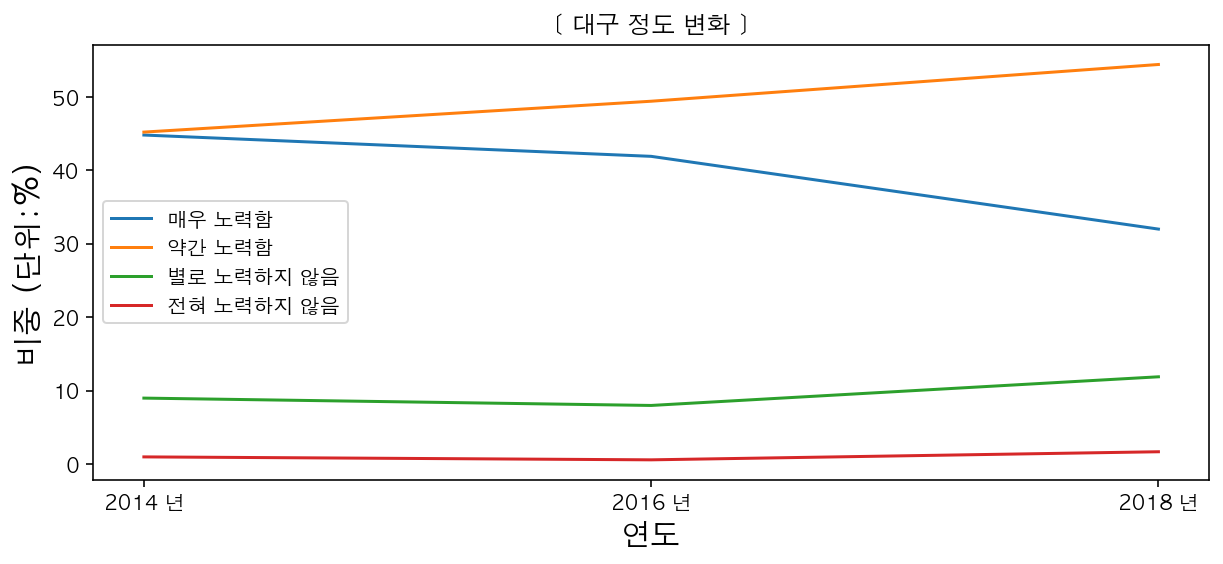

In [110]:
make_graph(data=recycle_daegu)

- 앞선 전국이나 서울에 비해서 매우 노력의 비중 적은편
- 왜인지 2018년도에 매우 노력이 급하락하고, 약간 노력, 별로 노력하지 않음이 상승

## 일회용품 사용하지 않기 데이터
- 대상 : 13세 이상 인구
- 출처 : <http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN075R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE>

### 전체 데이터 전처리

In [90]:
disposable_df = pd.read_csv("101_DT_1SSEN075R_20200912162515.csv", encoding='cp949')
disposable_df

,행정구역별,특성별,항목,단위,2014 년,2016 년,2018 년,Unnamed: 7
0,전국,계,계,NaN,100.0,100.0,100.0,NaN
1,전국,계,매우 노력함,NaN,20.3,22.8,18.8,NaN
2,전국,계,약간 노력함,NaN,49.5,48.7,46.9,NaN
3,전국,계,별로 노력하지 않음,NaN,27.5,25.7,30.6,NaN
4,전국,계,전혀 노력하지 않음,NaN,2.7,2.9,3.7,NaN
...,...,...,...,...,...,...,...,...
1675,제주,불만족,계,NaN,100.0,100.0,100.0,NaN
1676,제주,불만족,매우 노력함,NaN,23.0,28.1,22.5,NaN
1677,제주,불만족,약간 노력함,NaN,49.0,43.7,46.2,NaN
1678,제주,불만족,별로 노력하지 않음,NaN,23.8,21.2,28.6,NaN


In [91]:
# 상관없는 컬럼인 단위, Unnamed: 7 은 버려주기
disposable_df.drop(columns=["단위","Unnamed: 7"], inplace=True)
# 특성별도 총계 추출에 사용 후 제거
disposable = disposable_df[disposable_df["특성별"] == "계"]
disposable.drop(columns=["특성별"], inplace=True)

### 필요 데이터 추출 (전국, 서울, 대구)

In [92]:
# 전국
disposable_all = disposable[disposable["행정구역별"] == "전국"]
# 서울
disposable_seoul = disposable[disposable["행정구역별"] == "서울"]
# 대구
disposable_daegu = disposable[disposable["행정구역별"] == "대구"]

### 지역별 변화 시각화

**< 전국 >**

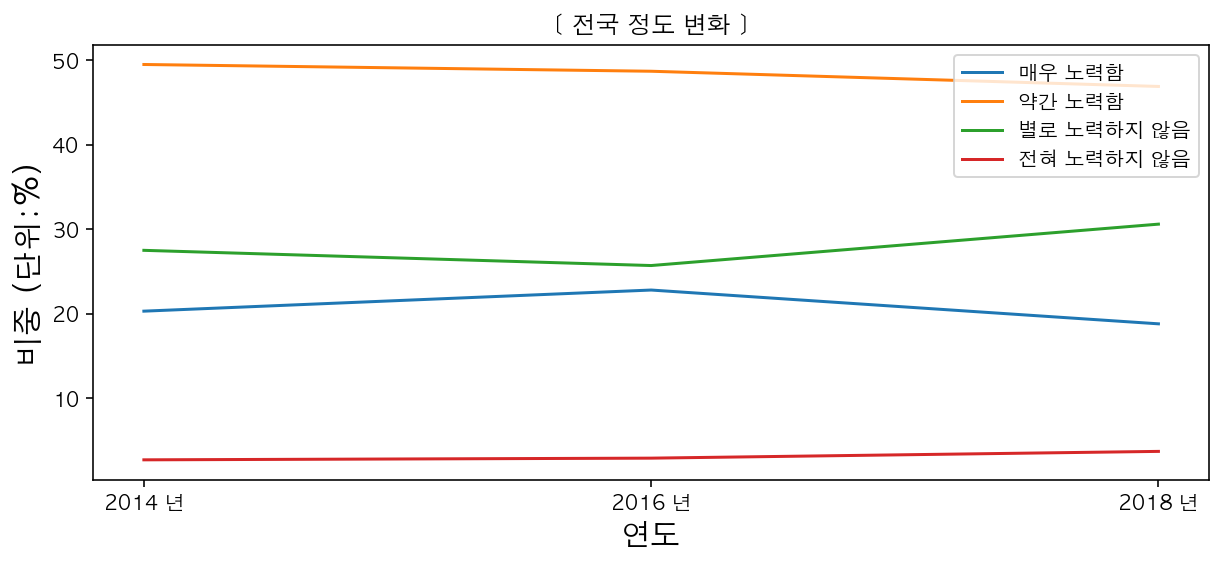

In [112]:
make_graph(disposable_all)

**< 서울 >**

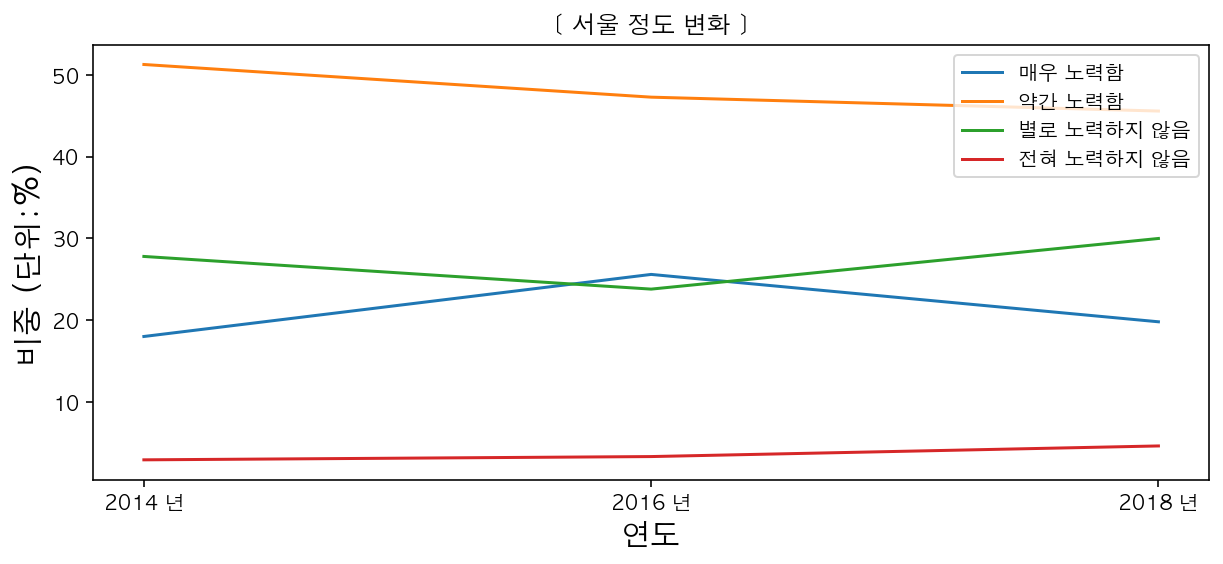

In [113]:
make_graph(disposable_seoul)

**< 대구 >**

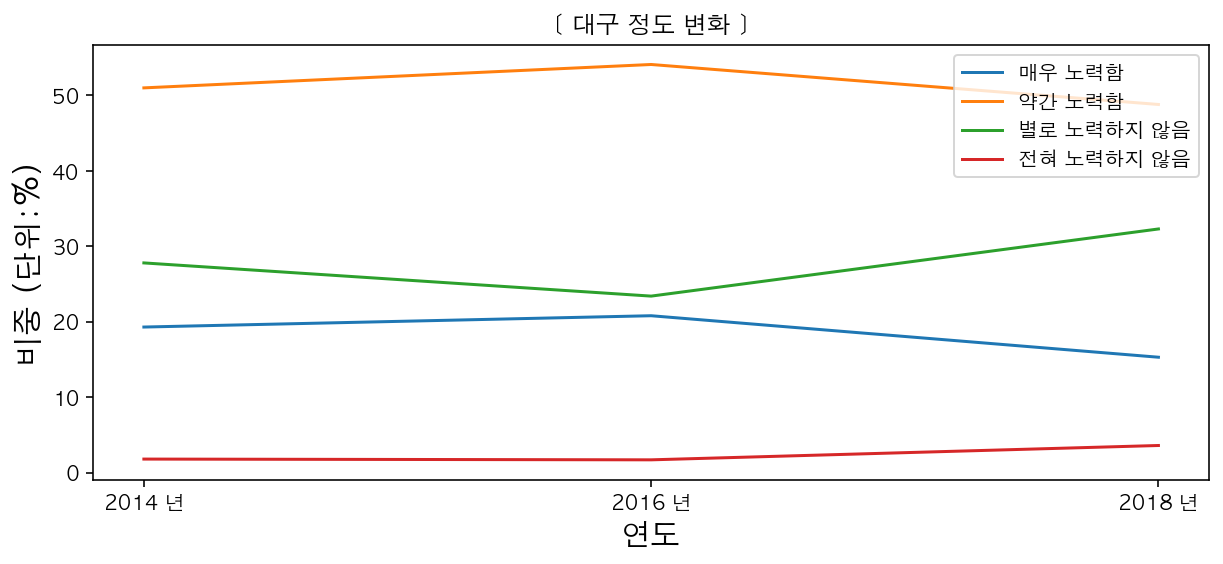

In [114]:
make_graph(disposable_daegu)

## 친환경제품 구입·사용하기 데이터
- 대상 : 13세 이상 인구
- 출처 : <http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSEN076R&vw_cd=MT_ZTITLE&list_id=101_D219&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE>

### 전체 데이터 전처리

In [123]:
eco_df = pd.read_csv("101_DT_1SSEN076R_20200912162433.csv", encoding='cp949')
eco_df

,행정구역별,특성별,항목,단위,2010 년,2012 년,2014 년,2016 년,2018 년,Unnamed: 9
0,전국,계,계,NaN,100.0,100.0,100.0,100.0,100.0,NaN
1,전국,계,매우 노력함,NaN,25.8,11.8,11.0,12.0,11.0,NaN
2,전국,계,약간 노력함,NaN,44.1,39.1,36.6,38.5,36.4,NaN
3,전국,계,별로 노력하지 않음,NaN,25.8,39.9,41.4,39.3,41.1,NaN
4,전국,계,전혀 노력하지 않음,NaN,4.3,9.2,11.0,10.2,11.5,NaN
...,...,...,...,...,...,...,...,...,...,...
1675,제주,불만족,계,NaN,100.0,100.0,100.0,100.0,100.0,NaN
1676,제주,불만족,매우 노력함,NaN,26.0,8.2,4.7,6.2,7.0,NaN
1677,제주,불만족,약간 노력함,NaN,46.1,32.5,25.9,32.2,46.4,NaN
1678,제주,불만족,별로 노력하지 않음,NaN,21.8,48.0,50.2,33.9,32.0,NaN


In [124]:
# 상관없는 컬럼인 단위, Unnamed: 7 은 버려주기
# 동일한 년도를 비교해주기 위해 2010년, 2012년도 제거
eco_df.drop(columns=["단위", "2010 년", "2012 년", "Unnamed: 9"], inplace=True)
# 특성별도 총계 추출에 사용 후 제거
eco = eco_df[eco_df["특성별"] == "계"]
eco.drop(columns=["특성별"], inplace=True)

### 필요 데이터 추출 (전국, 서울, 대구)

In [125]:
# 전국
eco_all = eco[eco["행정구역별"] == "전국"]
# 서울
eco_seoul = eco[eco["행정구역별"] == "서울"]
# 대구
eco_daegu = eco[eco["행정구역별"] == "대구"]

### 지역별 변화 시각화

**< 전국 >**

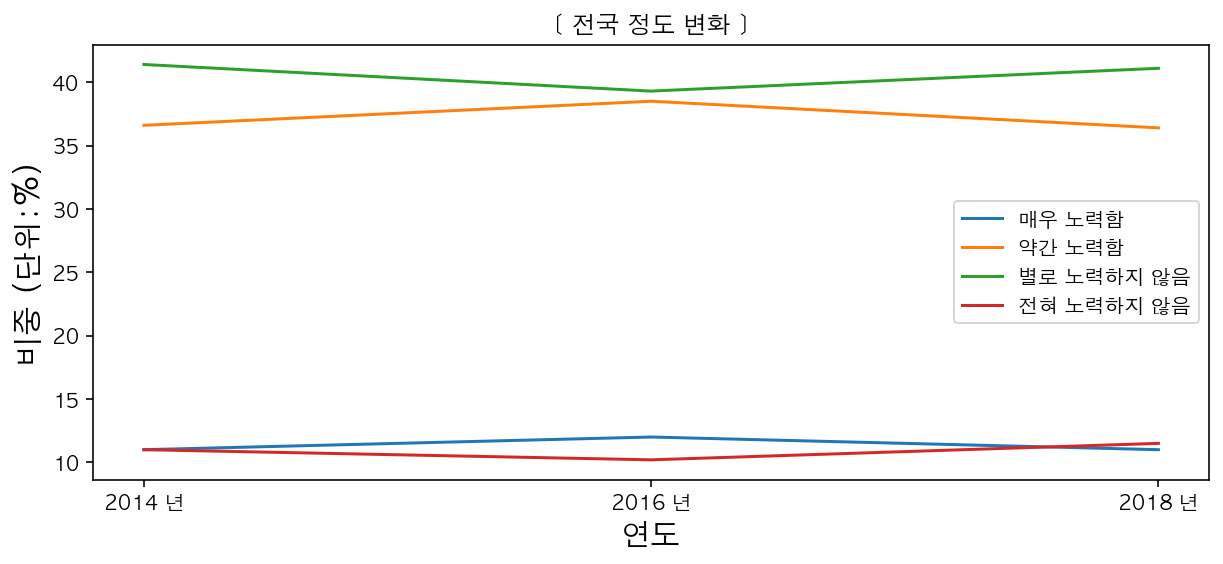

In [126]:
make_graph(eco_all)

- 생각보다 매우 노력함의 비중이 굉장히 낮음
- 약간 노력, 별로 노력하지 않음이 많이 높은 편
- 재활용과 달리 일상적인 행동이 아니기 때문에 스스로 매우 노력이라고 평가하지 않는 것 같다
- 역으로 생각해보면 '노력이 더 필요함을 느낀다'고 할 수 있지 않을까?

**< 서울 >**

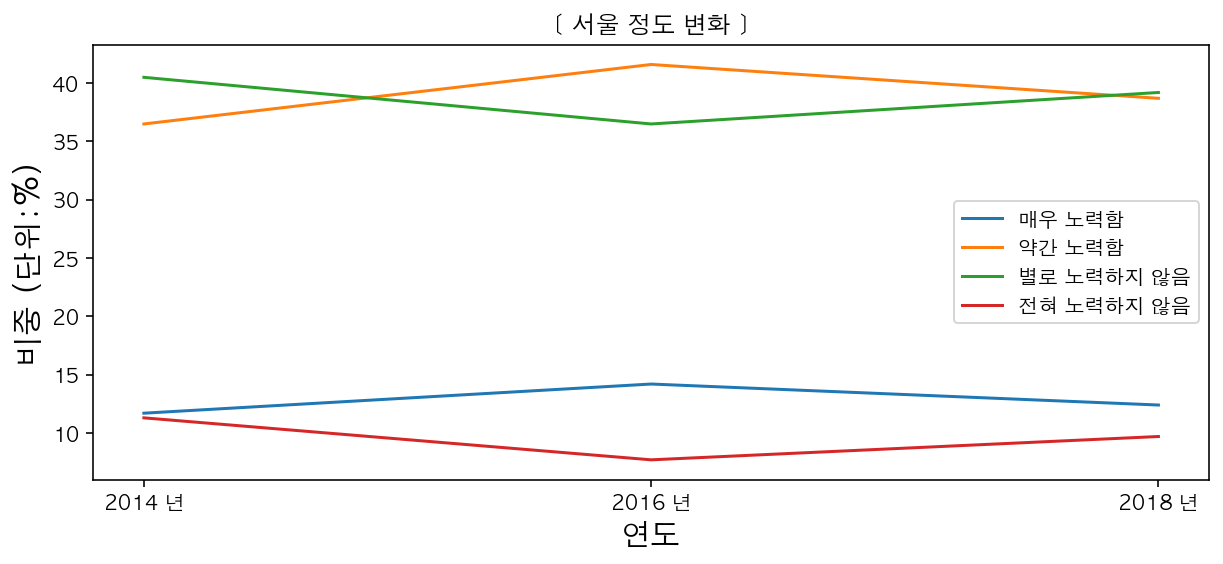

In [127]:
make_graph(eco_seoul)

- 서울이 전국보다는 매우 노력의 비중이 조금 더 높음
- 근데 사실 약간 노력, 별로 노력과 같이 보면 엄청난 차이라고 할 수는 없다

**< 대구 >**

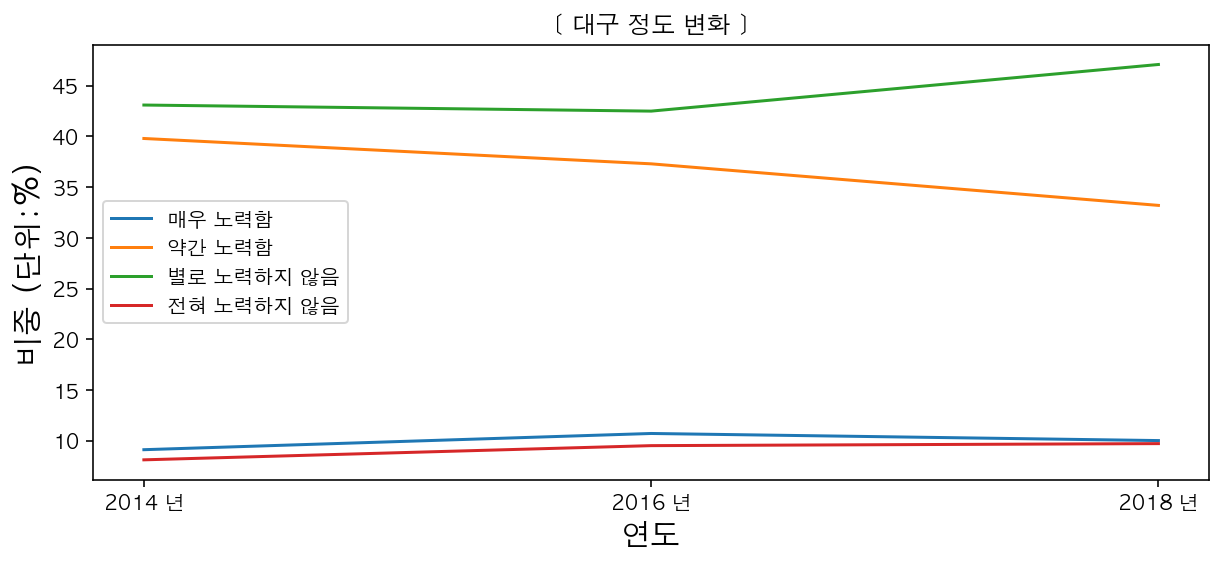

In [128]:
make_graph(eco_daegu)

===========================================================================================

한가지 추가로 신기한 점은, 

1) 일회용품 **사용하지 않기** 보다 2) 친환경제품 **구입/사용하기** 에서 노력한다는 인식이 낮게 나타났다는 점이다.

이는 사람들이 무엇인가를 사용하지 않는 것보다, 새로운 것을 사용하는 것에 좀 더 의식적으로 반응한다는 사실을 나타내는 것이 아닐까?

**사용하지 않는 것**은 수동적인 표현인 반면, 친환경제품을 **구입/사용한다**는 것은 적극적인 행동이라고 생각되는 바이다

## 생활 에너지 절약 정도

### 데이터 전체 전처리

In [136]:
save_df = pd.read_csv("201_DT_201_10550_2015_20200912162344.csv", encoding='cp949')
save_df

,대분류,분류,구분,항목,단위,2019 년,Unnamed: 6
0,종로구,종로구,가까운 거리는 걷거나 자전거이용,항목,NaN,6.177313,NaN
1,종로구,종로구,재활용원료나 재생소재로 만든 제품구매 노력,항목,NaN,5.809371,NaN
2,종로구,종로구,일회용품 사용하지 않기,항목,NaN,5.728696,NaN
3,종로구,종로구,비닐류는 깨끗한 상태로 투명비닐에 담아 배출,항목,NaN,5.937044,NaN
4,종로구,종로구,"상자류는 테이프, 운송자, 상표 등을 제거한 후 배출",항목,NaN,5.906575,NaN
...,...,...,...,...,...,...,...
307,지역대분류,동남권,재활용원료나 재생소재로 만든 제품구매 노력,항목,NaN,5.629562,NaN
308,지역대분류,동남권,일회용품 사용하지 않기,항목,NaN,6.043333,NaN
309,지역대분류,동남권,비닐류는 깨끗한 상태로 투명비닐에 담아 배출,항목,NaN,6.473344,NaN
310,지역대분류,동남권,"상자류는 테이프, 운송자, 상표 등을 제거한 후 배출",항목,NaN,6.551007,NaN


In [137]:
# 필요없는 항목 제거해주기 
save_df.drop(columns=["항목", "단위", "Unnamed: 6"], inplace=True)

우리는 구별로 시범 사업 지역을 선정할 것이기 때문에 '분류' 컬럼에서 지역별 분류형태만 남겨두고 제거

In [138]:
gu_ls = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
save_df = save_df[save_df["대분류"].isin(gu_ls)]

구별 생활 에너지별 절약 정도로 표 생성

In [145]:
save = save_df.pivot_table(index="분류", columns="구분", values="2019 년")
save

구분,가까운 거리는 걷거나 자전거이용,비닐류는 깨끗한 상태로 투명비닐에 담아 배출,"상자류는 테이프, 운송자, 상표 등을 제거한 후 배출",용기류 및 포장재는 내용물을 비우고 깨끗이 씻어 배출,일회용품 사용하지 않기,재활용원료나 재생소재로 만든 제품구매 노력
분류,,,,,,
강남구,6.907076,6.231538,6.750462,6.068353,5.914095,5.226928
강동구,6.927141,6.257355,5.966501,6.344938,6.126680,5.721001
강북구,7.292754,6.666101,7.000759,6.906389,5.769200,5.613752
강서구,6.068389,6.419210,6.361908,5.979826,6.395066,6.135988
관악구,7.121550,6.430811,6.609697,6.576259,6.200779,6.035540
광진구,7.195309,6.354504,6.373888,6.246120,6.062094,5.680799
구로구,6.145052,6.923184,7.351520,7.232692,6.154200,5.973330
금천구,6.977577,6.821509,7.283819,6.925742,6.297534,5.997285
노원구,6.620196,6.951633,7.372597,7.266311,5.461217,5.145970


### 구별 분석

우선 우리의 초점은 일회용품을 줄이는 것이므로, 가장 일회용품을 사용하지 않고자 하는 구를 찾아보자

In [164]:
print("1) 가장 일회용품 사용을 하지 않는 지역 : {}".format(save["일회용품 사용하지 않기"].idxmax()))

print("2) 용기류 및 포장재의 내용물을 비우고 깨끗이 씻어 배출을 가장 잘하는 지역 : {}"\
      .format(save["용기류 및 포장재는 내용물을 비우고 깨끗이 씻어 배출"].idxmax()))

print("3) 재활용원료나 재생소재로 만든 제품구매를 위해 가장 노력하는 지역 : {}"\
      .format(save["재활용원료나 재생소재로 만든 제품구매 노력"].idxmax()))

1) 가장 일회용품 사용을 하지 않는 지역 : 도봉구
2) 용기류 및 포장재의 내용물을 비우고 깨끗이 씻어 배출을 가장 잘하는 지역 : 노원구
3) 재활용원료나 재생소재로 만든 제품구매를 위해 가장 노력하는 지역 : 도봉구


- 도봉구, 노원구 쪽이 대부분 높게 나온다

- 다른 항목들도 봐 보자꾸나

In [167]:
print("4) 상자류는 테이프, 운송자, 상표 등을 제거한 후 배출하기 위해 가장 노력하는 지역 : {}"\
      .format(save["상자류는 테이프, 운송자, 상표 등을 제거한 후 배출"].idxmax()))

print("5) 가까운 거리는 걷거나 자전거이용하기 위해 가장 노력하는 지역 : {}"\
      .format(save["가까운 거리는 걷거나 자전거이용"].idxmax()))

print("6) 비닐류는 깨끗한 상태로 투명비닐에 담아 배출하기 위해 가장 노력하는 지역 : {}"\
      .format(save["비닐류는 깨끗한 상태로 투명비닐에 담아 배출"].idxmax()))

4) 상자류는 테이프, 운송자, 상표 등을 제거한 후 배출하기 위해 가장 노력하는 지역 : 노원구
5) 가까운 거리는 걷거나 자전거이용하기 위해 가장 노력하는 지역 : 강북구
6) 비닐류는 깨끗한 상태로 투명비닐에 담아 배출하기 위해 가장 노력하는 지역 : 도봉구


- 강북쪽은 에너지 청정구역이었던 것이었다..